<a href="https://colab.research.google.com/github/JohnTaco93/IMS_training/blob/main/ex9_1_ARMA_john.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%% Change to the root directory
# Example:
#os.chdir("C:/Users/Desktop/LAMDATA")
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/colab taco/IMS_training/Exercise9_python_Trainee

/content/gdrive/My Drive/colab taco/IMS_training/Exercise9_python_Trainee


In [ ]:
pip install lmfit

     |████████████████████████████████| 266kB 5.9MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 256kB 31.7MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=eddfa5a30dc4b9ab7243657dba28bfbc359448c660ab1920df1fa3219d4f1826
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.21-cp36-none-any.whl size=17287 sha256=8589fb397628822b97b40ef6bc1a5e2fe378412ccec3a7663aae60ee868319bc
  Stored in directory: /root/.cache/pip/wheels/53/9d/3b/da1ff15feb7d97bb195837f4e78f971c748a945bd4720003ce
Successfully built lmfit asteval


In [ ]:
pip install git+https://github.com/madrury/py-glm.git

  Cloning https://github.com/madrury/py-glm.git to /tmp/pip-req-build-rl3hcnin
  Running command git clone -q https://github.com/madrury/py-glm.git /tmp/pip-req-build-rl3hcnin
  Created wheel for py-glm: filename=py_glm-0.0.1-cp36-none-any.whl size=16020 sha256=957e18177706ce48e33b3cd09b5b9bc9eca520382a8731f64acabfd0fe689b2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-mpn9eb08/wheels/ba/f8/77/41a1cc9756ab50434bbadffdf60a20742fc01bfd5ea3e056eb
Successfully built py-glm


In [ ]:
#%% IMS TRAINING -- MINI PROJECT
#%% Exercise 9.1: Health Prediction Using ARMA Model

# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import glm
import numpy.polynomial.polynomial as poly
from functions import generate_data, exp_regression, exp_func, getAR, getInitial, getResiduals, getModelJacobian, ARMA, forecastARMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(0.0, 60.0)

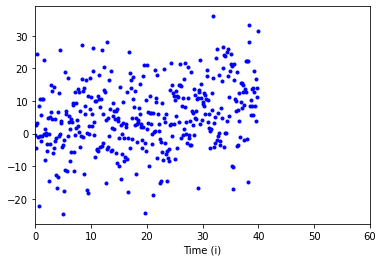

In [ ]:
# Initialization & data loading
t,y,t_test,y_test = generate_data()

plt.figure(1)
plt.plot(t, y, 'b.')
plt.xlabel('Time (i)')
plt.xlim([0, 60])


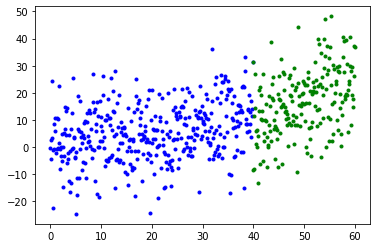

In [ ]:
#%% fitting

plt.figure(2);
plt.plot(t, y, 'b.',label='past data')
plt.plot(t_test, y_test, 'g.',label='future data')
tt = np.append(t,t_test,axis=0)

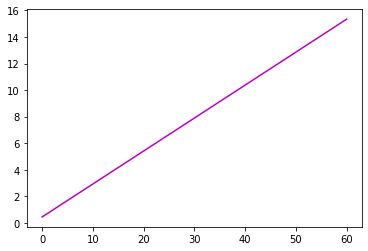

In [ ]:
# linear prediction model fittig
''' 
Fit an linear prediction model using the polynomial functions
example:
    coefs = poly.polyfit(t[:,0], y[:,0], 1)
    predict = poly.polyval(tt[:,0], coefs)
'''   
# ================= Your Code Here =========================
coefs = poly.polyfit(t[:,0], y[:,0], 1)
y_lin = poly.polyval(tt[:,0], coefs)
# ===============================
plt.plot(tt, y_lin, 'm', label='linear')

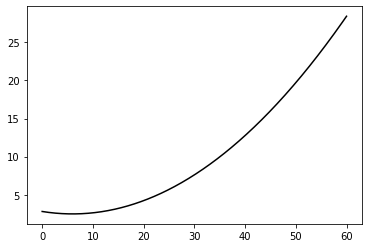

In [ ]:
# 2nd order polynomial fitting
'''
Fit an linear prediction model using the polynomial functions
'''
# ================= Your Code Here =========================
coefs = poly.polyfit(t[:,0], y[:,0], 2)
y_poly = poly.polyval(tt[:,0], coefs)
# ===============================
plt.plot(tt, y_poly, 'k', label='quadratic')

/content/gdrive/My Drive/colab taco/IMS_training/Exercise9_python_Trainee/functions.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params,resid,rank,ss = np.linalg.lstsq(p,Y[:,i:i+1])


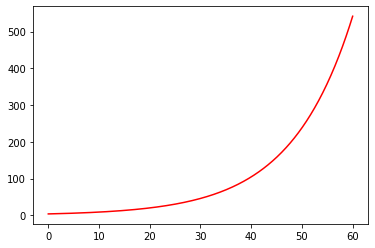

In [ ]:
betahat, yy = exp_regression(y, t)
y_exp = exp_func(betahat, tt)

plt.plot(tt, y_exp, 'r', label='exponential')


Text(0.5, 0, 'Time (i)')

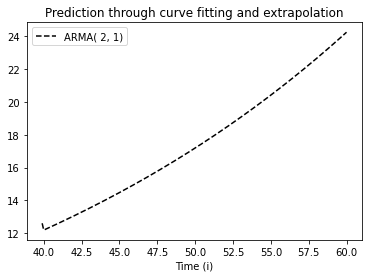

In [ ]:
# ARMA prediction
k = len(t_test) # k step ahead

# Predicted the future health trend using the 'forecastARMA' function 
# ================= Your Code Here =========================
#ARMA Model
data = y
p = 2
q = 1
ahead = k
phi,theta,fcast,SSR_pred = forecastARMA(data,p,q,ahead)
# =====================================================
plt.figure(2)
plt.plot(t_test, fcast, '--k',label='ARMA({p: 0.0f},{q: 0.0f})'.format(p=p, q=q))
plt.legend()
plt.title('Prediction through curve fitting and extrapolation')
plt.xlabel('Time (i)')